# Homework 7

In this notebook...
- Use PCA to determine principal components of genotypic data
- Perform PCA using 2 covariates, and compare this to PCA on a full dataset

## Problem Statement

$\textbf{Note:}$ the covariates (independent variables) in this dataset are genes and are the rows of the `edata.csv` file. The dependent variable is the phenotype and is the `cancer` column of the `pdata.csv` file. The instances of the dataset are cells and are both the columns of `edata.csv` and the rows of `pdata.csv`.

1. How many genes are there in the dataset? This is equal to the number of rows in the `edata.csv` file.


2. Run PCA on the genotype data. Make sure to demean each covariate. You can use the same code provided in the discussion. What is the ratio between the variance explained by the first component and the variance explained by the second component? What is the ratio between that of the first and tenth components?


3. Create an array of the weight of each covariate for the $\textit{first}$ principal component (the first column of $\textbf{v}$). This is the principal component with the highest explained variance. $\textbf{Hint:}$ `.components_` gives the weight of each covariate for each component in order of explained variance (highest explained variance is first). Report the length of your array -- it should be the same as your answer to part 1.


4. Using your array from part 3, find and clearly report the indices (in your array from part 3) of the two covariates which contribute the most to the first component. This will be the two covariates with the highest absolute values in your part 3 array. You can use `np.argsort()` to find these, but you do not have to.


5. Plot the values of your two genes found in part 4 for every data point. You should be plotting two rows of `edata.csv`. The index of a gene in your part 3 array will be the same as its index in `edata.csv`. Color each point by its phenotype. You can use the same code provided in the discussion notebook. You are welcome to plot the raw data or the demeaned data.


6. Now run PCA again but only use data from the two genes you found in part 4 (two covariates). Make sure the data is demeaned for this. Transform the data into component space and plot the data in the space of the first (only) two components. The code for transforming and plotting data in component space can be found in the discussion notebook.

Recall in the discussion that running PCA on the full dataset made it easier to classify the data even from just the first 2 principal componets. (Easier to classify means the 3 colors are in more separate clumps). You should see from this problem that just using the 2 genes which explain the most variance in the dataset does not make the data easier to classify. This shows the power of PCA as a dimensionality reduction tool -- using many variables to determine the best axes to classify data, even though PCA is an unsupervised learning method.

Import modules

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import json
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA

Load data

In [3]:
# import phenotype data
pdata = pd.read_csv("./data/pdata.csv")
# import expression data
edata = pd.read_csv("./data/edata.csv")

1. How many genes are there in the dataset? This is equal to the number of rows in the `edata.csv` file.

In [35]:
print('Number of genes:', edata.shape[0])

Number of genes: 22283


2. Run PCA on the genotype data. Make sure to demean each covariate. You can use the same code provided in the discussion. What is the ratio between the variance explained by the first component and the variance explained by the second component? What is the ratio between that of the first and tenth components?

In [36]:
# extract genotype data to perform PCA on
pcadata = np.swapaxes(np.array(edata.iloc[:,1:]),0,1)
pcadata = pcadata-np.mean(pcadata,axis=0) #demean data
# peform PCA
pca = PCA()
pca.fit(pcadata)
# transform data into component space
data_c = pca.transform(pcadata)

print('Ratio 1:2 ', pca.explained_variance_ratio_[0]/pca.explained_variance_ratio_[1])
print('Ratio 1:10 ', pca.explained_variance_ratio_[0]/pca.explained_variance_ratio_[9])

Ratio 1:2  2.3513122340761825
Ratio 1:10  18.976568022063024


3. Create an array of the weight of each covariate for the $\textit{first}$ principal component (the first column of $\textbf{v}$). This is the principal component with the highest explained variance. $\textbf{Hint:}$ `.components_` gives the weight of each covariate for each component in order of explained variance (highest explained variance is first). Report the length of your array -- it should be the same as your answer to part 1.

In [37]:
first_v = pca.components_[0,:]
print(len(first_v))

22283


4. Using your array from part 3, find and clearly report the indices (in your array from part 3) of the two covariates which contribute the most to the first component. This will be the two covariates with the highest absolute values in your part 3 array. You can use `np.argsort()` to find these, but you do not have to.

In [38]:
ind = np.abs(first_v).argsort()[-2:]
print(ind)

[21687  8509]


5. Plot the values of your two genes found in part 4 for every data point. You should be plotting two rows of `edata.csv`. The index of a gene in your part 3 array will be the same as its index in `edata.csv`. Color each point by its phenotype. You can use the same code provided in the discussion notebook. You are welcome to plot the raw data or the demeaned data.

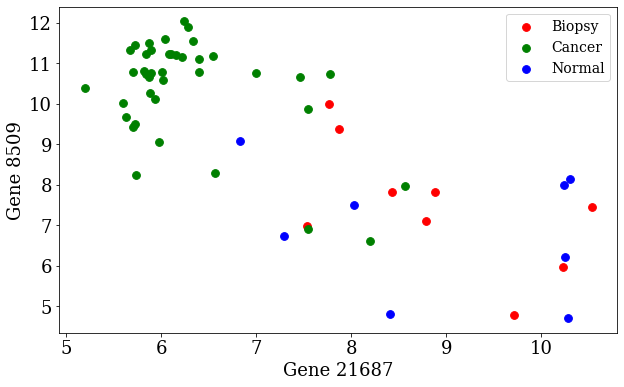

In [39]:
label = np.array(pdata.loc[:,'cancer']) #set phenotype as labels
cdict = {'Normal':'b','Biopsy':'r','Cancer':'g'} #plot data with color corresponding to phenotype

#edata.iloc[:,1:]

fig,ax=plt.subplots(figsize=(10,6))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
for l in np.unique(label):
    ix = np.where(label==l)
    for i in ix:
        ax.scatter(edata.iloc[21687,i+1],edata.iloc[8509,i+1],60,c=cdict[l],label=l)
ax.legend(fontsize=14)
ax.set_xlabel('Gene 21687')
ax.set_ylabel('Gene 8509')
plt.show()

6. Now run PCA again but only use data from the two genes you found in part 4 (two covariates). Make sure the data is demeaned for this. Transform the data into component space and plot the data in the space of the first (only) two components. The code for transforming and plotting data in component space can be found in the discussion notebook.

Recall in the discussion that running PCA on the full dataset made it easier to classify the data even from just the first 2 principal componets. (Easier to classify means the 3 colors are in more separate clumps). You should see from this problem that just using the 2 genes which explain the most variance in the dataset does not make the data easier to classify. This shows the power of PCA as a dimensionality reduction tool -- using many variables to determine the best axes to classify data -- even though PCA is an unsupervised learning method.

In [40]:
# slice and demean data
data_p4 = [edata.iloc[8509,1:],edata.iloc[21687,1:]]
pcadata_6 = np.swapaxes(np.array(data_p4),0,1)
pcadata_6 = pcadata_6-np.mean(pcadata_6,axis=0) 

# peform PCA
pca_6 = PCA()
pca_6.fit(pcadata_6)

# transform data into component space
data_c = pca_6.transform(pcadata_6)

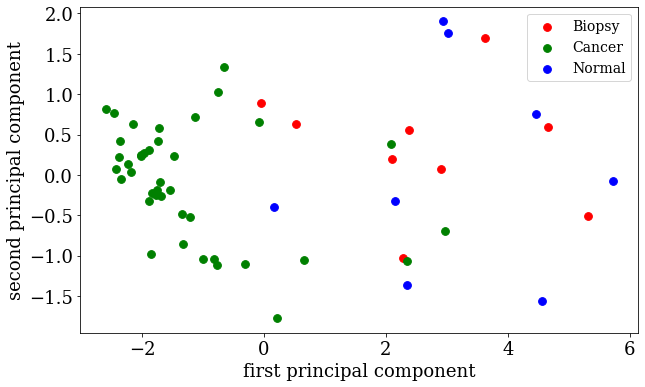

In [41]:
# plot data in component space
fig,ax=plt.subplots(figsize=(10,6))
plt.rc('font', **font)
for l in np.unique(label):
    ix = np.where(label==l)
    for i in ix:
        ax.scatter(data_c[ix,0],data_c[ix,1],60,c=cdict[l],label=l)
ax.legend(fontsize=14)
ax.set_xlabel('first principal component')
ax.set_ylabel('second principal component')
plt.show()